In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

***Adiabatic Endothermic Reaction***

You can download Fogler's book from here:
https://doku.pub/download/h-scott-fogler-essentials-of-chemical-reaction-engineering-z0x2ze484wqn

In [2]:
# define consant values
Fao = 0.0376
Cpa = 163
delCp = -9
Cao = 18.8
Cpc = 34.5
mc = 0.111 
To = 1035
Ta = 1250
Ua = 0 # since it is an adiabatic process

In [3]:
def odes (x, V): #x is actually a vector

    #assign each ODE (ordinary differential equation) to a vector element
    X = x[0]
    T = x[1]
    Ta = x[2]
    
    # explicit equation inline
    ra = -Cao*3.58*np.exp(34222*(1/To-1/T))*(1-X)*(To/T)/(1+X)
    deltaH = 80770 + delCp*(T-298)

    # define each ODE
    dxdV = -ra/Fao
    dTdV = (Ua*(Ta-T)+ra*deltaH)/(Fao*(Cpa+X*delCp))
    dTadV = Ua*(T-Ta)/mc/Cpc 

    return np.array([dxdV, dTdV, dTadV])

In [4]:
# initial conditions
x0 = np.array([0, To, Ta])

# declare a volume vector (volume window)
V = np.linspace(0, 0.004, 1000)

# solution of the ode
sol = odeint(odes, x0, V)

X, T, Ta = sol.T

ra = -Cao*3.58*np.exp(34222*(1/To-1/T))*(1-X)*(To/T)/(1+X)

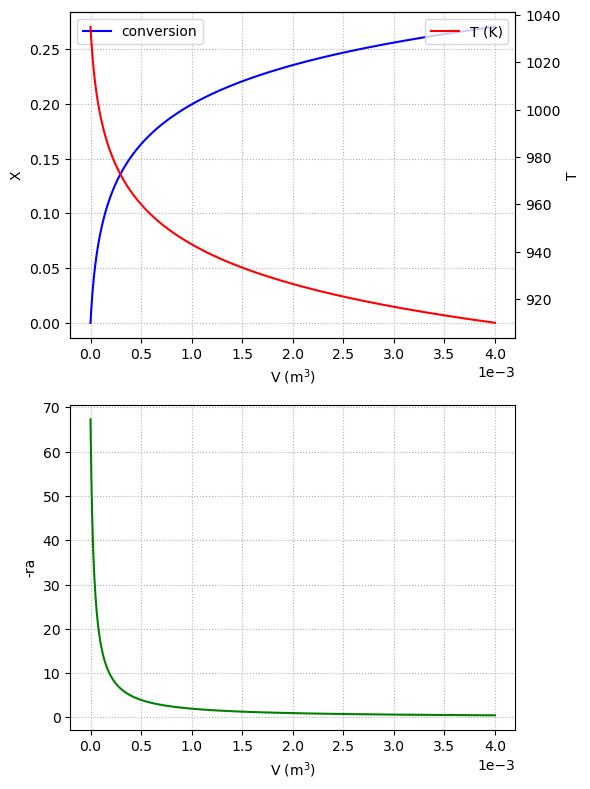

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (6, 8), dpi = 100)

# plot X vs V
ax1.plot(V, X, "b-", label = "conversion")
ax1.set_ylabel("X")
ax1.set_xlabel("V (m$^3$)")
ax1.legend(facecolor='white')
ax1.grid(linestyle='dotted')
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,3))

# plot T vs V
ax0 = ax1.twinx()

ax0.plot(V,T, "r-", label= "T (K)")
ax0.set_ylabel("T")
ax0.set_xlabel("V (m$^3$)")
ax0.legend(facecolor='white')

# plot -ra vs V
ax2.plot(V, -ra, "g-")
ax2.set_ylabel("-ra")
ax2.set_xlabel("V (m$^3$)")
ax2.grid(linestyle='dotted')
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,3))

fig.tight_layout()